In [5]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [6]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [60]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [61]:
exo_data = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
exo_data = exo_data.dropna(axis='columns', how='all')
# Drop the null rows
exo_data = exo_data.dropna()
exo_data.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [69]:
# df = exo_data.drop(['koi_disposition', 'koi_period_err2'], axis=1)

In [70]:
# Set features. This will also be used as your x values.
selected_features = exo_data[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag']]
X = selected_features
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,162.513840,0.003520,-0.003520,0.586,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,175.850252,0.000581,-0.000581,0.969,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,170.307565,0.000115,-0.000115,1.276,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,171.595550,0.001130,-0.001130,0.701,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,172.979370,0.001900,-0.001900,0.762,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,8.589871,1.846000e-04,132.016100,0.015700,-0.015700,0.765,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,0,1,1,0,0.527699,1.160000e-07,131.705093,0.000170,-0.000170,1.252,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,0,0,0,0,1.739849,1.780000e-05,133.001270,0.007690,-0.007690,0.043,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,0,0,1,0,0.681402,2.430000e-06,132.181750,0.002850,-0.002850,0.147,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Create a Train Test Split

Use `koi_disposition` for the y values

In [71]:
y = exo_data['koi_disposition']

In [72]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [73]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class) + '    ' + 'Encoded Label: ' + str(label))

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
from keras.utils import to_categorical
# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [81]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScalar model and fit it to the training data
X_scaler = MinMaxScaler().fit(X_train)

In [82]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,133.077240,0.008440,-0.008440,0.150,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,132.020050,0.007950,-0.007950,0.291,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,134.460380,0.006190,-0.006190,0.970,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,174.662240,0.001820,-0.001820,0.300,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,172.258529,0.000083,-0.000083,0.831,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


In [83]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1,  Train/Test score:  1.000 / 0.788
k: 3,  Train/Test score:  0.897 / 0.811
k: 5,  Train/Test score:  0.878 / 0.820
k: 7,  Train/Test score:  0.866 / 0.823
k: 9,  Train/Test score:  0.856 / 0.828
k: 11,  Train/Test score:  0.849 / 0.828
k: 13,  Train/Test score:  0.849 / 0.822
k: 15,  Train/Test score:  0.841 / 0.824
k: 17,  Train/Test score:  0.838 / 0.826
k: 19,  Train/Test score:  0.836 / 0.824


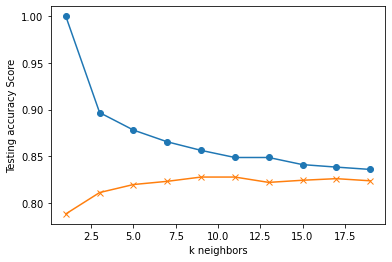

In [91]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# YOUR CODE HERE
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    tr_score = knn.score(X_train_scaled, y_train)
    tst_score = knn.score(X_test_scaled, y_test)
    train_scores.append(tr_score)
    test_scores.append(tst_score)
    print(f"k: {k},  Train/Test score:  {tr_score:.3f} / {tst_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [115]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

print('Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

Test Acc: 0.825


In [116]:

predicted_class = knn.predict(X_test)
print(predicted_class)

['FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' ... 'FALSE POSITIVE'
 'FALSE POSITIVE' 'FALSE POSITIVE']


# Train the Model



In [117]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8579057791340835
Testing Data Score: 0.8249427917620137


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [144]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
# grid_params = { 'n_neighbors' : [3,5,11], 
#                'weights': ['uniform', 'distance'] }

grid_params = { 'n_neighbors' : [3,5,11]  }

# grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1)

grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=3, n_jobs=-1)

In [145]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.9s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11]}, verbose=3)

In [146]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 11}
0.8138434277647196


# Save the Model

In [147]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'exoplanet_kkn_model.sav'
joblib.dump(knn, filename)

['exoplanet_kkn_model.sav']